#Tarea 3 Clasificación de texto

#Librerias

In [1]:
!pip install requests beautifulsoup4
!pip install transformers -q #clasificacion
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install requests beautifulsoup4 nltk


In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Guardar el gráfico en Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Monta Google Drive


Mounted at /content/drive


In [159]:

# Define the path where you want to save the plot
save_path = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/Tarea3"



#Lista de deportes

In [25]:
sports = [
    "football", "cricket", "baseball", "formula1", "rugby-union", "tennis",
    "golf", "athletics", "cycling"]

print(sorted(sports))


['athletics', 'baseball', 'cricket', 'cycling', 'football', 'formula1', 'golf', 'rugby-union', 'tennis']


# URL - WEB SCRAPING

In [26]:
import requests
from bs4 import BeautifulSoup

def extraer_contenido(url):
    # Obtener el HTML de la página
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        # Analizar el HTML con BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")

        # Buscar el contenido principal (esto puede variar según la estructura de la página)
        contenido = soup.find_all(["p", "h1", "h2", "h3"])  # Extrae párrafos y títulos

        # Unir el texto extraído
        texto = "\n".join([elemento.get_text() for elemento in contenido])
        return texto
    else:
        return f"Error {response.status_code}: No se pudo obtener la página."




In [27]:
import requests
from bs4 import BeautifulSoup
import re

# URL de la página principal de BBC Newshttps://www.bbc.com/news
base_url = 'https://www.bbc.com'

categories = sorted(sports)
articles = []

for category in categories:
    # Quitar el último "/"
    category2 = category.rstrip('/')

    # Formar la URL de la noticia
    news_url = f'{base_url}/{category2}'

    try:
        # Hacer la solicitud GET para obtener el contenido de la página
        response = requests.get(news_url)

        # Verificar si la solicitud fue exitosa
        if response.status_code == 200:
            # Parsear el contenido HTML de la página
            soup = BeautifulSoup(response.text, 'html.parser')

            # Obtener todos los enlaces de la página
            links = soup.find_all('a', href=True)

            # Filtrar los enlaces que terminan en '/articles/'
            article_links = [link['href'] for link in links if category in link['href'] and '/articles/' in link['href'] and '#comments' not in link['href']]

            # Mostrar los primeros 5 artículos encontrados
            for i, article_link in enumerate(article_links):  # Mostrar solo los primeros 5
                # Asegurar que el enlace es absoluto
                full_link = article_link if article_link.startswith('http') else base_url + article_link

                # Extraer el identificador único después de '/articles/'
                match = re.search(r'/articles/([a-z0-9]+)', article_link)
                if match:
                    article_id = match.group(1)
                    articles.append(full_link)
                else:
                    print(f"No se encontró un identificador único en la URL: {full_link}")
        else:
            print(f"Error al acceder a la URL {news_url}, código de estado: {response.status_code}")
    except requests.RequestException as e:
        # Si ocurre cualquier error (conexión, tiempo de espera, etc.), se salta a la siguiente categoría
        print(f"Excepción al intentar acceder a la URL {news_url}: {e}")
        continue




Error al acceder a la URL https://www.bbc.com/rugby-union, código de estado: 404


In [28]:
len(articles)

190

In [77]:
articles[:10]

['https://www.bbc.com/sport/athletics/articles/cd0j35p1exeo',
 'https://www.bbc.com/sport/athletics/articles/c87dynj5ew1o',
 'https://www.bbc.com/sport/athletics/articles/c0m14rpdn4yo',
 'https://www.bbc.com/sport/athletics/articles/cvgmnxrdpx7o',
 'https://www.bbc.com/sport/athletics/articles/c5y65px0gjdo',
 'https://www.bbc.com/sport/athletics/articles/cp8q30e732yo',
 'https://www.bbc.com/sport/athletics/articles/c07kggzm20do',
 'https://www.bbc.com/sport/athletics/articles/cx2qp3zzk53o',
 'https://www.bbc.com/sport/athletics/articles/c4gxvj91vnxo',
 'https://www.bbc.com/sport/athletics/articles/ce3lw5nyx8wo']

In [69]:
import requests
from bs4 import BeautifulSoup

# URL de la página principal de BBC
url = 'https://www.bbc.com'



# Obtiene el contenido de la página
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:

    soup = BeautifulSoup(response.text, 'html.parser')

    # Link principales(menú de la parte superior)
    menu_links = soup.find_all('a', href=True)

    # Filtrar los enlaces que contienen categorías
    category_id = [link['href'] for link in menu_links if any(category in link['href'] for category in ['news','earth', 'business','innovation', 'culture','art','travel', 'technology', 'entertainment'])]





#Considerar solo lo que tienen al menos un "/" y una letra
category_id = [category for category in category_id if category.count('/') >= 1 and any(char.isalpha() for char in category)]

#Considerar solo los que inician con "/"
category_id = [category for category in category_id if category.startswith('/')]

#quitar aquellos que tienen un "# "
category_id = [category for category in category_id if not category.startswith('#')]

#Quitar los que dicen http
category_id = [category for category in category_id if not category.startswith('http')]

#quitar los que de lon sea menor a 2
category_id = [category for category in category_id if len(category) > 2]


#si contiene "bbc.com" quitar
category_id = [category for category in category_id if not  "https://www.bbc.+" in category]

#ordenarlos
category_id = sorted(category_id)

#valores unicos
category_id = list(set(category_id))

In [70]:
len(category_id)

128

In [72]:
#Extraer aquellos que ya tienen un articulo
article_link = [category for category in category_id if "article" in category]

#quitar article_link de category_id
category_id = [category for category in category_id if not category in article_link]

In [81]:
len(article_link)

57

In [82]:
len(category_id)

71

In [63]:
import requests
from bs4 import BeautifulSoup
import re

# URL de la página principal de BBC Newshttps://www.bbc.com/news
base_url = 'https://www.bbc.com'

categories = category_id
articles_new = []

for category in categories:

  #Quitar el ultimo "/"
  #si contiene un "/" al final, quitarlo
  category2 = category

  if category.endswith('/'):
    category2 = category[:-1]

  news_url = f'{base_url}{category2}'

  try:
        # Hacer la solicitud GET para obtener el contenido de la página
        response = requests.get(news_url)

        # Verificar si la solicitud fue exitosa
        if response.status_code == 200:
            # Parsear el contenido HTML de la página
            soup = BeautifulSoup(response.text, 'html.parser')

            # Obtener todos los enlaces de la página
            links = soup.find_all('a', href=True)

            # Filtrar los enlaces que terminan en '/articles/'
            article_links = [link['href'] for link in links if category in link['href'] and '/articles/' in link['href'] and '#comments' not in link['href']]

            # Mostrar los primeros 5 artículos encontrados
            for i, article_link in enumerate(article_links):  # Mostrar solo los primeros 5
                # Asegurar que el enlace es absoluto
                full_link = article_link if article_link.startswith('http') else base_url + article_link

                # Extraer el identificador único después de '/articles/'
                match = re.search(r'/articles/([a-z0-9]+)', article_link)
                if match:
                    article_id = match.group(1)
                    articles_new.append(full_link)
                else:
                    print(f"No se encontró un identificador único en la URL: {full_link}")
        else:
            print(f"Error al acceder a la URL {news_url}, código de estado: {response.status_code}")
  except requests.RequestException as e:
        # Si ocurre cualquier error (conexión, tiempo de espera, etc.), se salta a la siguiente categoría
        print(f"Excepción al intentar acceder a la URL {news_url}: {e}")
        continue




In [83]:
len(articles_new)

41

In [86]:
articles_new[:10]

['https://www.bbc.com/news/articles/cvgpvq20qmdo',
 'https://www.bbc.com/news/articles/c4g35pjd48xo',
 'https://www.bbc.com/news/articles/cdjdmx12j9no',
 'https://www.bbc.com/news/articles/cqx9dgpx98go',
 'https://www.bbc.com/news/articles/cvgpvq20qmdo',
 'https://www.bbc.com/news/articles/c0rqj171zzvo',
 'https://www.bbc.com/news/articles/c4g35pjd48xo',
 'https://www.bbc.com/news/articles/c62e7d6r08ro',
 'https://www.bbc.com/news/articles/c805jgk3vj1o',
 'https://www.bbc.com/news/articles/cn01z1yy0jno']

In [87]:
articles[:10]

['https://www.bbc.com/sport/athletics/articles/cd0j35p1exeo',
 'https://www.bbc.com/sport/athletics/articles/c87dynj5ew1o',
 'https://www.bbc.com/sport/athletics/articles/c0m14rpdn4yo',
 'https://www.bbc.com/sport/athletics/articles/cvgmnxrdpx7o',
 'https://www.bbc.com/sport/athletics/articles/c5y65px0gjdo',
 'https://www.bbc.com/sport/athletics/articles/cp8q30e732yo',
 'https://www.bbc.com/sport/athletics/articles/c07kggzm20do',
 'https://www.bbc.com/sport/athletics/articles/cx2qp3zzk53o',
 'https://www.bbc.com/sport/athletics/articles/c4gxvj91vnxo',
 'https://www.bbc.com/sport/athletics/articles/ce3lw5nyx8wo']

In [85]:

article_link[:10]

['/travel/article/20250131-khapse-a-sweet-that-brings-peace-and-tranquility',
 '/news/articles/cly91zgdp0vo',
 '/sport/golf/articles/c805jp9lpj4o',
 '/news/articles/c5y7626l610o',
 '/future/article/20250131-how-the-climate-is-changing-the-taste-of-beer',
 '/travel/article/20250127-angelababys-guide-to-hong-kong',
 '/news/articles/c5ye0py04xpo',
 '/news/articles/cwy18lpm7n2o',
 '/news/articles/cn93519jpz7o',
 '/news/articles/cvgpvq20qmdo']

In [88]:
base_url

'https://www.bbc.com'

In [89]:
#pegar base url y article_link
for a in article_link:
 articles.append(f'{base_url}{a}')



In [91]:
#pegar article_link
for a in articles_new:
 articles.append(f'{a}')



In [107]:
#unir url
# Lista de URLs
urls = [
    'https://www.bbc.com/news/articles/cn0ygzj715ro', #Internacional Middle east
    'https://www.bbc.com/news/articles/c79d74nppvpo',  #Business
    'https://www.bbc.com/news/articles/cly5zmm186no', ##Internacional Middle east
    'https://www.bbc.com/news/articles/c8d9r0vg6v7o', #Internacional Middle east
    'https://www.bbc.com/news/articles/c0rq0vyd549o', #Business
    'https://www.bbc.com/news/articles/c5yv5976z9po',
    'https://www.bbc.com/news/articles/czxkn393rwwo',
    'https://www.bbc.com/news/articles/c9vm1m8wpr9o',
    'https://www.bbc.com/news/articles/cnvqe3le3z4o',
    'https://www.bbc.com/news/articles/c74mj39dkklo',
    'https://www.bbc.com/news/articles/c5yelgxk3rlo',
    'https://www.bbc.com/news/articles/ceq901dxjnzo',
    'https://www.bbc.com/news/articles/cg5ydgeqrvqo',
    'https://www.bbc.com/future/article/20250129-how-america-fell-in-love-with-chinas-memes',
    'https://www.bbc.com/news/articles/cqx9e0y17wwo',
    'https://www.bbc.com/news/articles/c79d7y0l03po',
    'https://www.bbc.com/news/videos/c93qx53pzn3o',
    'https://www.bbc.com/news/articles/cx24pvgxn0no',
    'https://www.bbc.com/news/articles/ckgn1dd6g1po',
    'https://www.bbc.com/news/articles/cy8xvnr5jv4o',
    'https://www.bbc.com/news/articles/cdxerg03xrqo',
    'https://www.bbc.com/news/articles/c3604r84zjyo',
    'https://www.bbc.com/culture/article/20250128-six-nordic-paintings-that-can-help-us-rethink-winter',
    'https://www.bbc.com/worklife/article/20221111-the-tensions-that-fan-tricky-in-law-relationships',
    'https://www.bbc.com/future/article/20240228-how-alcohol-affects-teens-and-young-adults-brains',
    'https://www.bbc.com/future/article/20250124-how-to-carry-more-than-your-own-bodyweight',
    'https://www.bbc.com/future/article/20240719-are-fermented-foods-actually-good-for-you',
    'https://www.bbc.com/news/videos/cq5g09zpzz6o',
    'https://www.bbc.com/news/articles/c5yd97w74l9o',
    'https://www.bbc.com/news/articles/c78w1x7lwd1o',
    'https://www.bbc.com/news/world-middle-east-67053011',
    'https://www.bbc.com/news/world-middle-east-67477240',
    'https://www.bbc.com/news/world-middle-east-67039975',
    'https://www.bbc.com/news/articles/cn0ygzj715ro',
    'https://www.bbc.com/news/articles/cy8xvnr5jv4o',
    'https://www.bbc.com/news/articles/cwyp8nkgxj3o',
    'https://www.bbc.com/news/articles/c8d9r0vg6v7o',
    'https://www.bbc.com/news/articles/c5yvd91j72eo',
    'https://www.bbc.com/news/articles/cgly1yrd9j3o',
    'https://www.bbc.com/sport/football/articles/c78xzr20y3lo',
    'https://www.bbc.com/sport/football/articles/c2d3n579rkjo',
    'https://www.bbc.com/news/articles/c79d74nppvpo',
    'https://www.bbc.com/news/articles/c78w1x7lwd1o',
    'https://www.bbc.com/news/articles/czxkn393rwwo',
    'https://www.bbc.com/news/articles/c0jnd4eg6ndo',
    'https://www.bbc.com/news/articles/cqx9zn27700o',
    'https://www.bbc.com/news/articles/cly56015x57o',
    'https://www.bbc.com/news/articles/cze391y17z7o',
    'https://www.bbc.com/news/articles/ckg728vvnl1o',
    'https://www.bbc.com/future/article/20220119-how-to-read-the-doomsday-clock',
    'https://www.bbc.com/news/articles/cqjvw90j81ro',
    'https://www.bbc.com/news/articles/ckgy4lp5pvwo',
    'https://www.bbc.com/news/articles/cde9r0xgk67o',
    'https://www.bbc.com/news/articles/cwyp6y9w4r7o',
    'https://www.bbc.com/travel/article/20250127-angelababys-guide-to-hong-kong',
    'https://www.bbc.com/travel/article/20250127-one-of-the-last-traders-on-the-silk-road',
    'https://www.bbc.com/travel/article/20250127-butrint-the-ancient-site-helping-albania-reclaim-its-identity',
    'https://www.bbc.com/future/article/20250128-how-wildlife-survives-after-wildfires',
    'https://www.bbc.com/news/articles/c7vd1zjlr5lo',
    'https://www.bbc.com/news/articles/cd9qy4knd8wo'
    # Puedes seguir agregando más URLs
]

#pegar base url y article_link
for a in urls:
 articles.append(f'{a}')

In [108]:
len(articles)

348

# Vectorizacion

In [109]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


#Lista para los tipos de noticia considerando la url despues de https://www.bbc.com/



# Lista para almacenar los resultados
articles_data = []

# Función para extraer la categoría y subcategoría de la URL
def extract_category_and_subcategory(url):
    match = re.search(r'https://www\.bbc\.com/(\w+)/(\w+)/', url)
    if match:
        main_category = match.group(1)  # news
        sub_category = match.group(2)   # articles
        return main_category, sub_category
    return None, None

# Iterar sobre cada URL
for url in articles:
    # Obtener el contenido de la página
    response = requests.get(url)

    # Verificar que la solicitud fue exitosa
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Intentar extraer el contenido del artículo (ajustar según el HTML de la página)
        article_text = soup.find('div', class_='article-body')  # Modificar según el HTML

        if not article_text:
            article_text = soup.get_text()
        else:
            article_text = article_text.get_text()

        # Extraer la categoría y subcategoría de la URL
        main_category, sub_category = extract_category_and_subcategory(url)

        # Almacenar los datos de la noticia, URL, categoría y subcategoría
        articles_data.append({
            'URL': url,
            'text': article_text,
            'main_category': main_category,
            'sub_category': sub_category
        })
    else:
        print(f"Error al acceder a la URL {url}, código de estado: {response.status_code}")

# Crear un DataFrame con los artículos
df = pd.DataFrame(articles_data)

# Mostrar el DataFrame
print(df)


                                                   URL  \
0    https://www.bbc.com/sport/athletics/articles/c...   
1    https://www.bbc.com/sport/athletics/articles/c...   
2    https://www.bbc.com/sport/athletics/articles/c...   
3    https://www.bbc.com/sport/athletics/articles/c...   
4    https://www.bbc.com/sport/athletics/articles/c...   
..                                                 ...   
343  https://www.bbc.com/travel/article/20250127-on...   
344  https://www.bbc.com/travel/article/20250127-bu...   
345  https://www.bbc.com/future/article/20250128-ho...   
346     https://www.bbc.com/news/articles/c7vd1zjlr5lo   
347     https://www.bbc.com/news/articles/cd9qy4knd8wo   

                                                  text main_category  \
0    World Indoor Tour Gold Meeting: Melissa Courtn...         sport   
1    Hammer throw death: Athletics spectator killed...         sport   
2    Phoebe Gill to return to Belfast Irish Milers ...         sport   
3    Keely Hodg

In [110]:
#Contar el numero de noticias
print(len(df['text']))

348


## Añadimos categorias

Si es sport 1 , si no 0

In [111]:
#Si es noticia 0 y si es sport 1
df['label'] = df['main_category'].apply(lambda x: 1 if x == 'sport' else 0)

#Si label es 0 , cambiar main_category a news
df['main_category'] = df['label'].apply(lambda x: 'news' if x == 0 else 'sport')


##  Visualización

## Articulos por categoría

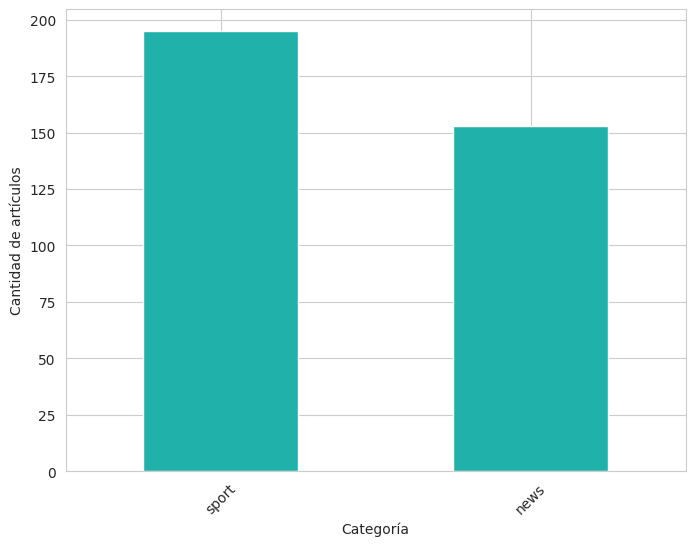

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un histograma de la cantidad de artículos por categoría
category_counts = df['main_category'].value_counts()

# Graficar el histograma
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='lightseagreen')
#plt.title('Cantidad de artículos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de artículos')
plt.xticks(rotation=45)

ruta=save_path+ '/Hist_cat.pdf'
# Guardar el gráfico
plt.savefig(ruta, format="pdf", bbox_inches="tight")

#Guardar el grafico en drive


plt.show()


In [176]:
len(df_sport)

195

In [162]:
print(f"El gráfico ha sido guardado en: {ruta}")

El gráfico ha sido guardado en: /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/Tarea3/Hist_cat.pdf


## Stop Words

In [114]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar stopwords si no las tienes
nltk.download('stopwords')
nltk.download('punkt')

# Lista de pronombres personales en inglés (extraídos de las stopwords)
personal_pronouns = {"i", "me", "my", "mine", "myself",
                     "you", "your", "yours", "yourself",
                     "he", "him", "his", "himself",
                     "she", "her", "hers", "herself",
                     "it", "its", "itself",
                     "we", "us", "our", "ours", "ourselves",
                     "they", "them", "their", "theirs", "themselves"}



def eliminar_stop_words(text):


    # Tokenizar el texto
    words = word_tokenize(text)

    # Eliminar pronombres
    filtered_words = [word for word in words if word.lower() not in personal_pronouns]

    # Unir palabras en un string
    filtered_text = " ".join(filtered_words)

    # Eliminar etiquetas HTML usando expresiones regulares
    text_sin_html = re.sub(r'<br\s*/?>|<p.*?>|</?\w+>|bbc|said|hrs', '', filtered_text)

    #Quitar algunas palabras comunes como "bbc"
    text_sin_html = re.sub(r'BBC', ' ', text_sin_html)

    #eLIMINAR pronombres personales en inglés


    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    palabras = word_tokenize(text_sin_html.lower())  # Tokenizar el texto limpio
    palabras_filtradas = [palabra for palabra in palabras if palabra.isalnum() and palabra.lower() not in stop_words]

    return ' '.join(palabras_filtradas)

#Remover "bbc"
df['processed_text2'] = df['text'].fillna('').astype(str).apply(eliminar_stop_words)

# Tokenizar palabra
all_words = ' '.join(df["processed_text2"]).split()


word_freq = Counter(all_words)

# Convertir a DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

print(word_freq_df.head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


           word  frequency
128         day        932
57          new        905
219     england        877
0         world        841
79          one        775
296    external        772
2836       days        695
12513     trump        682
491       first        680
275      league        679


### Tokenización

In [115]:
from collections import Counter

# Tokenizar palabras
all_words = ' '.join(df["processed_text2"]).split()


word_freq = Counter(all_words)

# Convertir a DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

print(word_freq_df.head(10))

           word  frequency
128         day        932
57          new        905
219     england        877
0         world        841
79          one        775
296    external        772
2836       days        695
12513     trump        682
491       first        680
275      league        679


#### Frecuencias

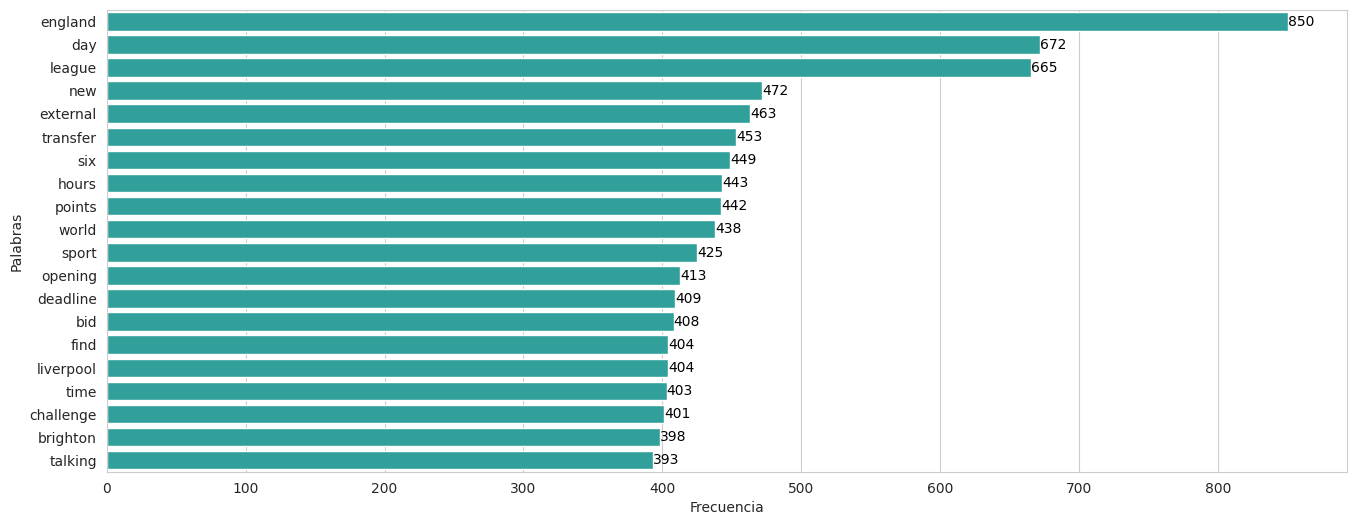

In [163]:

# Seleccionar las 20 palabras más frecuentes
top_words = word_freq_df.head(20)

# Gráfica de barras
plt.figure(figsize=(16, 6))
ax=sns.barplot(data=top_words, x='frequency', y='word', color='lightseagreen')
# Agregar los conteos a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}',  # Añadir formato con separación de miles
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')


ruta=save_path+ '/Top20Cat.pdf'
plt.savefig(ruta, format="pdf", bbox_inches="tight")
#plt.title('Top 20 de palabras más frecuentes usando conteo')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()

         word  frequency
219   england        850
128       day        672
275    league        665
57        new        472
296  external        463
126  transfer        453
148       six        449
143     hours        443
146    points        442
0       world        438


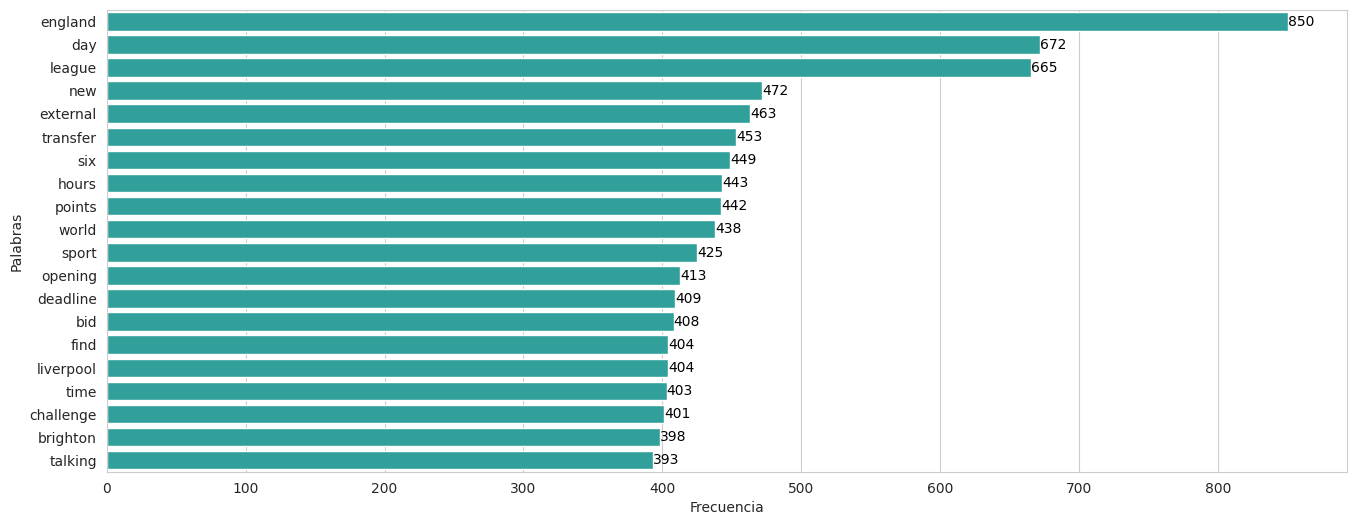

In [164]:
#Top de frecuecnias de deportes
from collections import Counter

# Tokenizar palabras

df_sport=df[df['label']==1]

all_words= ' '.join(df_sport["processed_text2"]).split()


word_freq = Counter(all_words)

# Convertir a DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

print(word_freq_df.head(10))
# Seleccionar las 20 palabras más frecuentes
top_words = word_freq_df.head(20)

# Gráfica de barras
plt.figure(figsize=(16, 6))
ax=sns.barplot(data=top_words, x='frequency', y='word', color='lightseagreen')
# Agregar los conteos a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}',  # Añadir formato con separación de miles
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')
#plt.title('Top 20 de palabras más frecuentes usando conteo')

ruta=save_path+ '/Top20Cat_Sport.pdf'
plt.savefig(ruta, format="pdf", bbox_inches="tight")
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()

         word  frequency
1071    trump        682
152      days        565
1055  tariffs        507
1320     says        488
394      also        446
61        new        433
329     could        417
96        one        413
297     world        403
1077    would        389


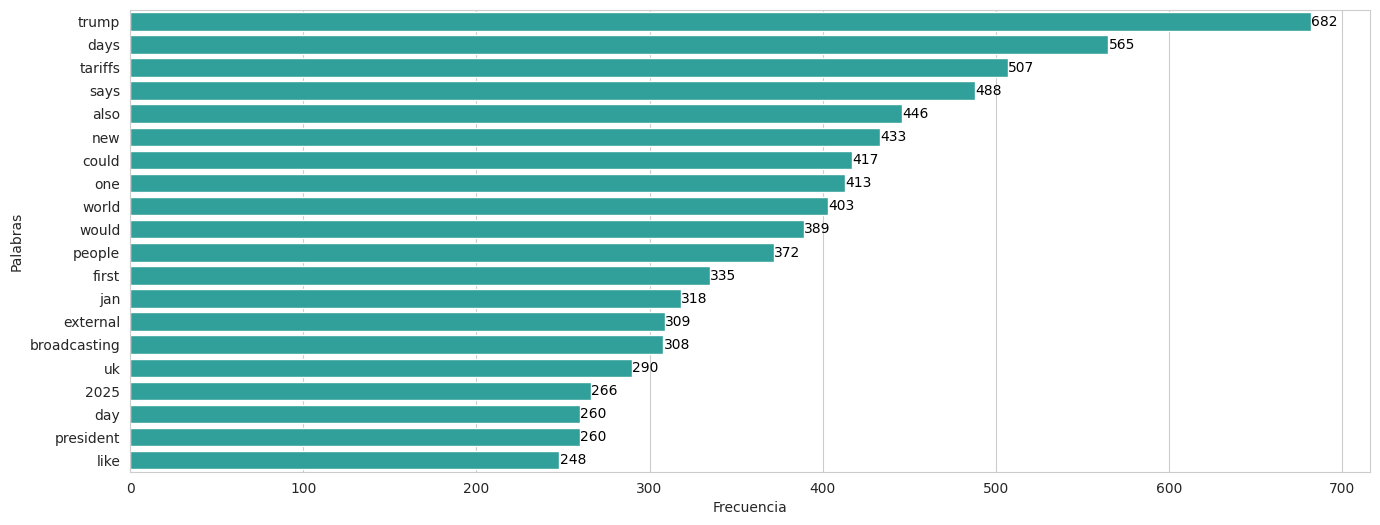

In [165]:
#Top de frecuecnias de noticias
from collections import Counter

# Tokenizar palabras

df_news=df[df['label']==0]

all_words= ' '.join(df_news["processed_text2"]).split()


word_freq = Counter(all_words)

# Convertir a DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

print(word_freq_df.head(10))
# Seleccionar las 20 palabras más frecuentes
top_words = word_freq_df.head(20)

# Gráfica de barras
plt.figure(figsize=(16, 6))
ax=sns.barplot(data=top_words, x='frequency', y='word', color='lightseagreen')
# Agregar los conteos a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}',  # Añadir formato con separación de miles
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')
#plt.title('Top 20 de palabras más frecuentes usando conteo')

ruta=save_path+ '/Top20Cat_News.pdf'
plt.savefig(ruta, format="pdf", bbox_inches="tight")

plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()

#### Conteo de palabras

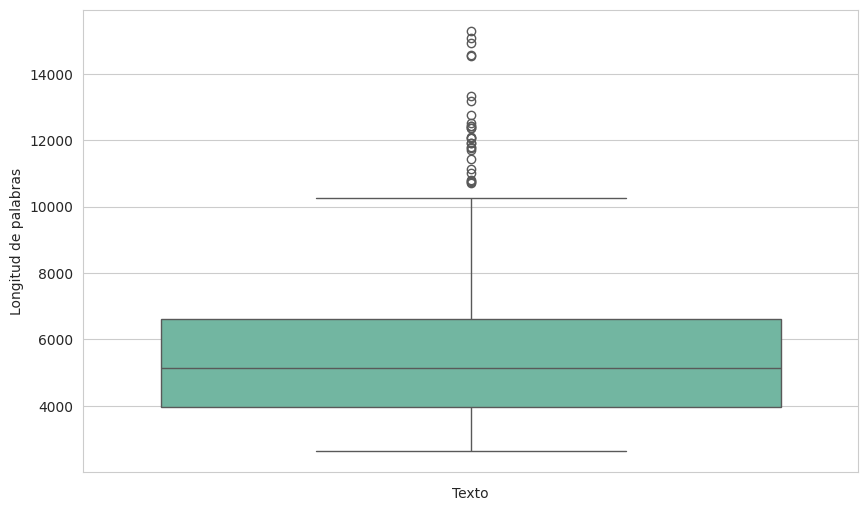

In [177]:
df['char_count'] = df['processed_text2'].apply(lambda x: len(str(x)))

df['char_count'].describe()

#Crear un boxplot con seasborn en vertical y de color naranja
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
#Color naranja
sns.set_palette("Set2")
#Titulos
#plt.title('Distribución de la longitud de los textos')

plt.xlabel('Texto')
#Horizonal
plt.ylabel('Longitud de palabras')
sns.boxplot(y=df['char_count'])
ruta=save_path+ '/BoxplotCat.pdf'

plt.savefig(ruta, format="pdf", bbox_inches="tight")
plt.show()

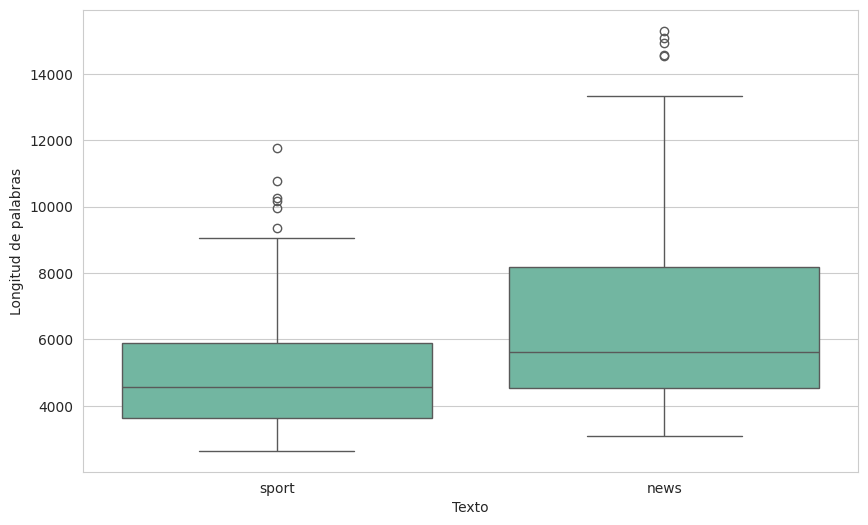

In [178]:
#Por tipo

#Crear un boxplot con seasborn en vertical y de color naranja
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
#Color naranja
sns.set_palette("Set2")
#Titulos
#plt.title('Distribución de la longitud de los textos')
plt.xlabel('Texto')
#Horizonal
plt.ylabel('Longitud de palabras')
sns.boxplot(y=df['char_count'], x=df["main_category"])

ruta=save_path+ '/BoxplotCat_2.pdf'
plt.savefig(ruta, format="pdf", bbox_inches="tight")

plt.show()

#### Densidad de palabras

In [128]:
# Calcular la densidad de palabras solo de sport
import spacy

# Cargar el modelo de lenguaje en español
nlp = spacy.load("en_core_web_sm")
#For para preprocesar los textos juntandolos
preprocessed_text = ' '
for text in df_sport['text'][:100]:
    preprocessed_text =preprocessed_text +' '+text + ' '


total_words = len(preprocessed_text.split())
non_stop_words = len([token.text for token in nlp(preprocessed_text) if not token.is_stop and not token.is_punct])
word_density = non_stop_words / total_words if total_words != 0 else 0

print(f"Densidad de palabras (non-stopwords / total words): {word_density:.2f}")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Densidad de palabras (non-stopwords / total words): 0.63


In [129]:
# Calcular la densidad de palabras solo de noticias
import spacy

# Cargar el modelo de lenguaje en español
nlp = spacy.load("en_core_web_sm")
#For para preprocesar los textos juntandolos
preprocessed_text = ' '
for text in df_news['text'][:100]:
    preprocessed_text =preprocessed_text +' '+text + ' '


total_words = len(preprocessed_text.split())
non_stop_words = len([token.text for token in nlp(preprocessed_text) if not token.is_stop and not token.is_punct])
word_density = non_stop_words / total_words if total_words != 0 else 0

print(f"Densidad de palabras (non-stopwords / total words): {word_density:.2f}")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Densidad de palabras (non-stopwords / total words): 0.59


In [131]:
df['word_count'] = df['processed_text2'].apply(lambda x: len(str(x).split()))

df['word_density'] = df['char_count'] / df['word_count']
df.head()

,URL,text,main_category,sub_category,label,processed_text2,char_count,word_count,word_density
0,https://www.bbc.com/sport/athletics/articles/c...,World Indoor Tour Gold Meeting: Melissa Courtn...,sport,athletics,1,world indoor tour gold meeting melissa sets wo...,3257,368,8.850543
1,https://www.bbc.com/sport/athletics/articles/c...,Hammer throw death: Athletics spectator killed...,sport,athletics,1,hammer throw death athletics spectator killed ...,3582,396,9.045455
2,https://www.bbc.com/sport/athletics/articles/c...,Phoebe Gill to return to Belfast Irish Milers ...,sport,athletics,1,phoebe gill return belfast irish milers meet s...,4559,547,8.334552
3,https://www.bbc.com/sport/athletics/articles/c...,Keely Hodgkinson: Olympic 800m gold medallist ...,sport,athletics,1,keely hodgkinson olympic 800m gold medallist v...,3735,423,8.829787
4,https://www.bbc.com/sport/athletics/articles/c...,Laura Muir: Steve Cram & Laura Weightman coach...,sport,athletics,1,laura muir steve cram laura weightman coaching...,3628,410,8.848780


#### Representación gráfica de conteo de palabras

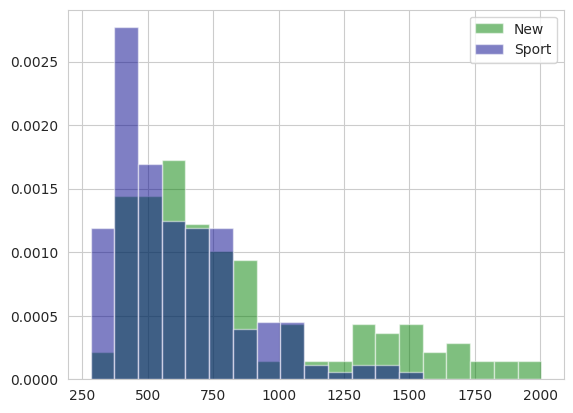

In [170]:
import matplotlib.pyplot as plt
import numpy as np
df_sport = df[df['label'] == 1]
df_news = df[df['label'] == 0]

plt.figure()
#plt.title('Conteo de palabras')
bins = np.linspace(np.min(df['word_count']), np.max(df['word_count']), 20)

plt.hist(df_news['word_count'],  label = 'New', bins = bins, color = 'green', alpha = 0.5, density = True)
plt.hist(df_sport['word_count'],  label = 'Sport', bins = bins, color = 'darkblue', alpha = 0.5, density = True)
plt.legend()

ruta=save_path+ '/ConteoPalabras.pdf'
plt.savefig(ruta, format="pdf", bbox_inches="tight")
plt.show()


##### Representación gráfica de cáracteres

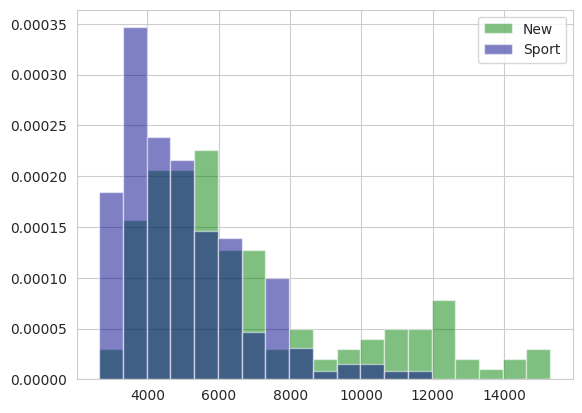

In [171]:
plt.figure()
#plt.title('Conteo de caracteres')
bins = np.linspace(np.min(df['char_count']), np.max(df['char_count']), 20)

plt.hist(df_news['char_count'],  label = 'New', bins = bins, color = 'green', alpha = 0.5, density = True)
plt.hist(df_sport['char_count'],  label = 'Sport', bins = bins, color = 'darkblue', alpha = 0.5, density = True)
plt.legend()
ruta=save_path+ '/ConteoCaracteres.pdf'
plt.savefig(ruta, format="pdf", bbox_inches="tight")
plt.show()

#### Representación gráfica de densidad de palabras

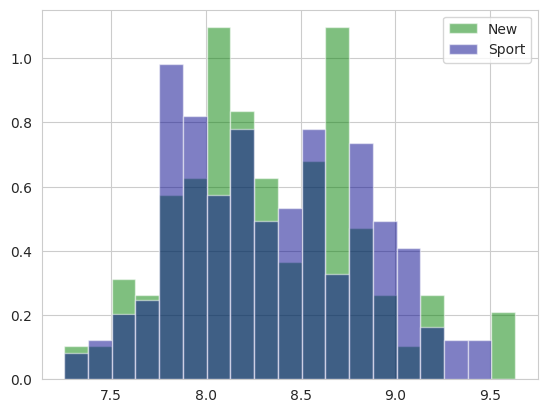

In [172]:
plt.figure()
#plt.title('Densidad de palabras')
bins = np.linspace(np.min(df['word_density']), np.max(df['word_density']), 20)

plt.hist(df_news['word_density'],  label = 'New', bins = bins, color = 'green', alpha = 0.5, density = True)
plt.hist(df_sport['word_density'],  label = 'Sport', bins = bins, color = 'darkblue', alpha = 0.5, density = True)
plt.legend()

ruta=save_path+ '/Densidad.pdf'
plt.savefig(ruta, format="pdf", bbox_inches="tight")
plt.show()

## Modelos

In [148]:
df.head(2)

,URL,text,main_category,sub_category,label,processed_text2,char_count,word_count,word_density
0,https://www.bbc.com/sport/athletics/articles/c...,World Indoor Tour Gold Meeting: Melissa Courtn...,sport,athletics,1,world indoor tour gold meeting melissa sets wo...,3257,368,8.850543
1,https://www.bbc.com/sport/athletics/articles/c...,Hammer throw death: Athletics spectator killed...,sport,athletics,1,hammer throw death athletics spectator killed ...,3582,396,9.045455


In [197]:
# Create Feature and Label sets
X = df['processed_text2']
y = df['label']

# train test split (80% train - 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (208,)
Testing Data :  (140,)


In [211]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import metrics

# Lista de modelos
modelos = {
    "SVM": Pipeline([("tfidf", TfidfVectorizer()), ("clf", SVC(kernel="linear", probability=True))]),
    "Random Forest": Pipeline([("tfidf", TfidfVectorizer()), ("clf", RandomForestClassifier(n_estimators=100))]),
    "Logistic": Pipeline([
    ("tfidf", TfidfVectorizer()),  # Convertir texto en números
    ("clf", LogisticRegression()) ]),   # Modelo de clasificación
    "Multinomial": Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
}

# Entrenar y evaluar cada modelo
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None

    resultados[nombre] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

# Mostrar resultados
import pandas as pd
df_resultados = pd.DataFrame(resultados).T
print(df_resultados)


#Predicción


               Accuracy  Precision  Recall  F1-Score  ROC-AUC
SVM            0.992857   1.000000  0.9875  0.993711      1.0
Random Forest  1.000000   1.000000  1.0000  1.000000      1.0
Logistic       0.985714   1.000000  0.9750  0.987342      1.0
Multinomial    0.992857   0.987654  1.0000  0.993789      1.0


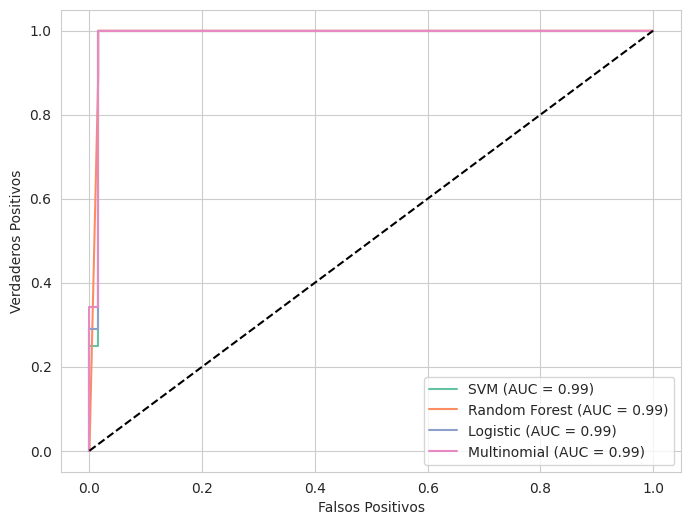

In [179]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(8, 6))

for nombre, modelo in modelos.items():
    if hasattr(modelo, "predict_proba"):
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
#plt.title("Curva ROC")
plt.legend()


ruta=save_path+ '/CurvaROC.pdf'
plt.savefig(ruta, format="pdf", bbox_inches="tight")
plt.show()

## Predicción

In [222]:
sport_ejemplo="https://www.bbc.com/sport/football/articles/cj918vvmz0go"
new_ejemplo="https://www.bbc.com/news/articles/c62e7d6r08ro"
# Ejemplo de uso
sport_ejemplo = extraer_contenido(sport_ejemplo)
new_ejemplo = extraer_contenido(new_ejemplo)

In [223]:

# Entrenar y evaluar cada modelo
pred = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)

    pred[nombre] = { "ejemplo1": modelo.predict([sport_ejemplo]), "ejemplos2": modelo.predict([new_ejemplo])}

#

In [224]:
pred

{'SVM': {'ejemplo1': array([1]), 'ejemplos2': array([0])},
 'Random Forest': {'ejemplo1': array([1]), 'ejemplos2': array([0])},
 'Logistic': {'ejemplo1': array([1]), 'ejemplos2': array([0])},
 'Multinomial': {'ejemplo1': array([1]), 'ejemplos2': array([0])}}

In [215]:
for nombre, modelo in modelos.items():
    print(nombre)
    #modelo.fit(X_train, y_train)


SVM
Random Forest
Logistic
Multinomial
